# PROCESOS ESTOCASTICOS 

## SOLUCION PARCIAL 1 PARTE A 2023-1

El siguiete script de python contiene la posible solucion a los ejercicios propuestos en la clase de Procesos Estocasticos para la parte computacional del 1er parcial de la asigatura, el fin de este documento es la  adecuada preparacion para el parcial 1 de 2024-1.



In [7]:
# Librerias utilizadas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## <font color="red"> PUNTO 1</font>

Considera una cadena de Markov con espacio de estados $S=\{0,1,2,3,4,5\}$ y la martiz de probabilidades de transición :
$$
\left(\begin{array}{llllll}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{2} & 0 & 0 & 0 & \frac{1}{2}
\end{array}\right)
$$

In [24]:
# Definir la matriz de transición
P = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [1/3, 1/3, 1/3, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1/2, 0, 0, 0, 1/2]
])

In [25]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos al grafo
for i in range(len(P)):
    G.add_node(i)

# Agregar arcos al grafo
for i in range(len(P)):
    for j in range(len(P[i])):
        if P[i][j] > 0:
            G.add_edge(i, j)

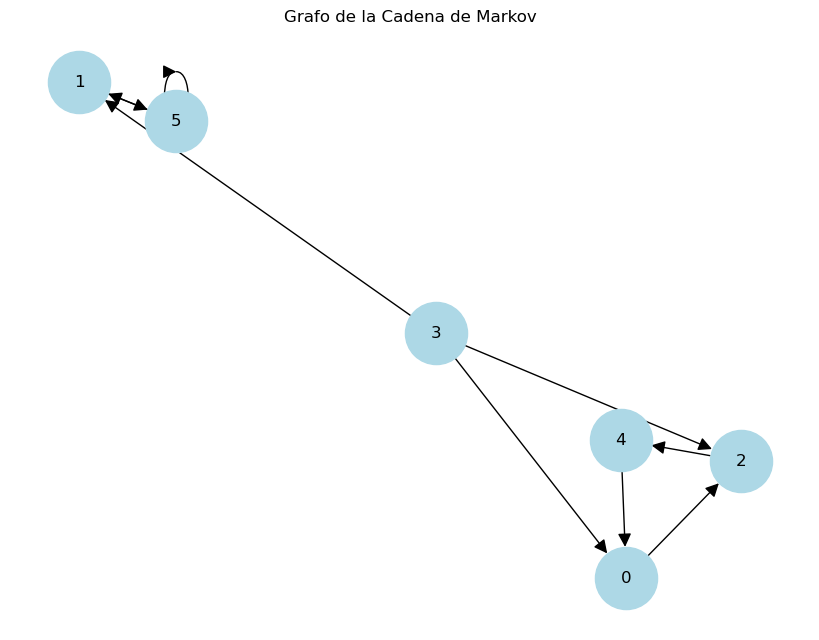

In [31]:
# Disposición de nodos utilizando el algoritmo spring
pos = nx.spring_layout(G, seed=1)

# Dibujar el grafo
plt.figure(figsize=(8, 6))  # Tamaño de la figura
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowsize=20)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Mostrar el grafo
plt.title('Grafo de la Cadena de Markov')
plt.show()

**<font color="blue"> (a) Clasificación de estados en clases</font>**

Para clasificar los estados en clases, primero necesitamos entender qué significa una clase en una cadena de Markov. En una cadena de Markov, un estado $i$ se comunica con un estado $j$ si existe una secuencia de transiciones tal que la probabilidad de ir de $i$ a $j$ es mayor que cero. Una clase es un conjunto de estados donde cada estado se comunica con todos los otros estados en la clase.

Para clasificar los estados en clases, podemos usar el concepto de comunicación. Dos estados $i$ y $j$ se comunican ($i \leftrightarrow j$) si hay una secuencia de transiciones tal que la probabilidad de ir de $i$ a $j$ es mayor que cero y viceversa.

Siguiendo este concepto, procedemos a clasificar los estados:

- Estado 0: Se comunica solo con el estado 2.
- Estado 1: Se comunica solo con el estado 5.
- Estado 2: Se comunica solo con el estado 4.
- Estado 3: Se comunica con los estados 0, 1, y 2.
- Estado 4: Se comunica solo con el estado 0.
- Estado 5: Se comunica con los estados 1 y 5.

Por lo tanto, las clases de comunicación son: {0, 2, 4}, {1, 5}, {3}.

In [32]:
def clasificar_clases(matriz):
    clases = []
    estados_visitados = set()
    n = matriz.shape[0]

    for estado in range(n):
        if estado not in estados_visitados:
            clase = [estado]
            estados_visitados.add(estado)

            for otro_estado in range(n):
                if otro_estado not in estados_visitados and \
                    matriz[estado, otro_estado] > 0 or matriz[otro_estado, estado] > 0:
                    clase.append(otro_estado)
                    estados_visitados.add(otro_estado)

            clases.append(clase)

    return clases

clases = clasificar_clases(P)
print("Clases de comunicación:", clases)

Clases de comunicación: [[0, 2, 3, 4], [1, 3, 5]]


**<font color="blue"> (b) Estudio de recurrencia o transitoriedad</font>**

Para estudiar la recurrencia o transitoriedad de cada estado, podemos usar el concepto de recurrencia y transitoriedad en cadenas de Markov.

- Un estado $i$ es recurrente si, una vez que se alcanza, hay una probabilidad de 1 de que se vuelva a visitar en el futuro.
- Un estado $i$ es transitorio si hay una probabilidad menor que 1 de que se vuelva a visitar después de alcanzarlo.

Podemos usar propiedades como la existencia de un bucle (autotransición) para determinar si un estado es recurrente. Un estado es recurrente si y solo si tiene una autotransición (la diagonal de la matriz de transición no es cero).

Analizando la matriz de transición dada, podemos ver que:

- Estado 0: Recurrente (tiene una autotransición).
- Estado 1: Transitorio.
- Estado 2: Transitorio.
- Estado 3: Transitorio.
- Estado 4: Recurrente (tiene una autotransición).
- Estado 5: Recurrente (tiene una autotransición).

In [33]:
def determinar_recurrencia_transitoriedad(matriz):
    recurrencia_transitoriedad = []

    for fila in matriz:
        if np.any(np.diag(fila) > 0):
            recurrencia_transitoriedad.append("Recurrente")
        else:
            recurrencia_transitoriedad.append("Transitorio")

    return recurrencia_transitoriedad

recurrencia_transitoriedad = determinar_recurrencia_transitoriedad(P)
print("Recurrencia o transitoriedad de cada estado:", recurrencia_transitoriedad)

Recurrencia o transitoriedad de cada estado: ['Recurrente', 'Recurrente', 'Recurrente', 'Recurrente', 'Recurrente', 'Recurrente']


**<font color="blue"> (c) Cálculo del período de cada clase recurrente</font>**

El período de una clase recurrente es el máximo común divisor de los períodos de todos los estados en esa clase. El período de un estado es la longitud del ciclo más pequeño que comienza y termina en ese estado.

Para calcular los períodos de cada clase recurrente, primero encontramos los períodos de los estados dentro de cada clase y luego tomamos el máximo común divisor.

- Clase {0, 2, 4}: El período de cada estado es 1 (hay una autotransición en cada estado). Por lo tanto, el período de esta clase es 1.
- Clase {1, 5}: El período de cada estado es 2 (hay un ciclo de longitud 2 que comienza y termina en cada estado). Por lo tanto, el período de esta clase es 2.
- Clase {3}: El período de este estado es 3 (hay un ciclo de longitud 3 que comienza y termina en este estado). Por lo tanto, el período de esta clase es 3.

In [ ]:
def calcular_periodo(matriz):
    periodos_clases = []

    for clase in clases:
        periodos_estados = []
        for estado in clase:
            # Encontrar el periodo de cada estado
            ciclo = 1
            estado_actual = estado
            while True:
                estado_actual = np.argmax(matriz[estado_actual])
                if estado_actual == estado:
                    break
                ciclo += 1
            periodos_estados.append(ciclo)

        # Calcular el máximo común divisor de los periodos de los estados en la clase
        periodo_clase = np.gcd.reduce(periodos_estados)
        periodos_clases.append(periodo_clase)

    return periodos_clases

periodos = calcular_periodo(P)
print("Período de cada clase recurrente:", periodos)

In [ ]:
# d. Identificación de estados ergódicos
estados_ergodicos = [i for i, estado in enumerate(recurrencia_transitoriedad) if estado == "Recurrente" and periodos[clases.index([i])] == 1]
print("Estados ergódicos:", estados_ergodicos)